In [1]:
import pygmt
import pandas as pd
import h5py

In [2]:
points = h5py.File('OUTPUT_FILES/initial_model.h5', 'r')['model'][:].T

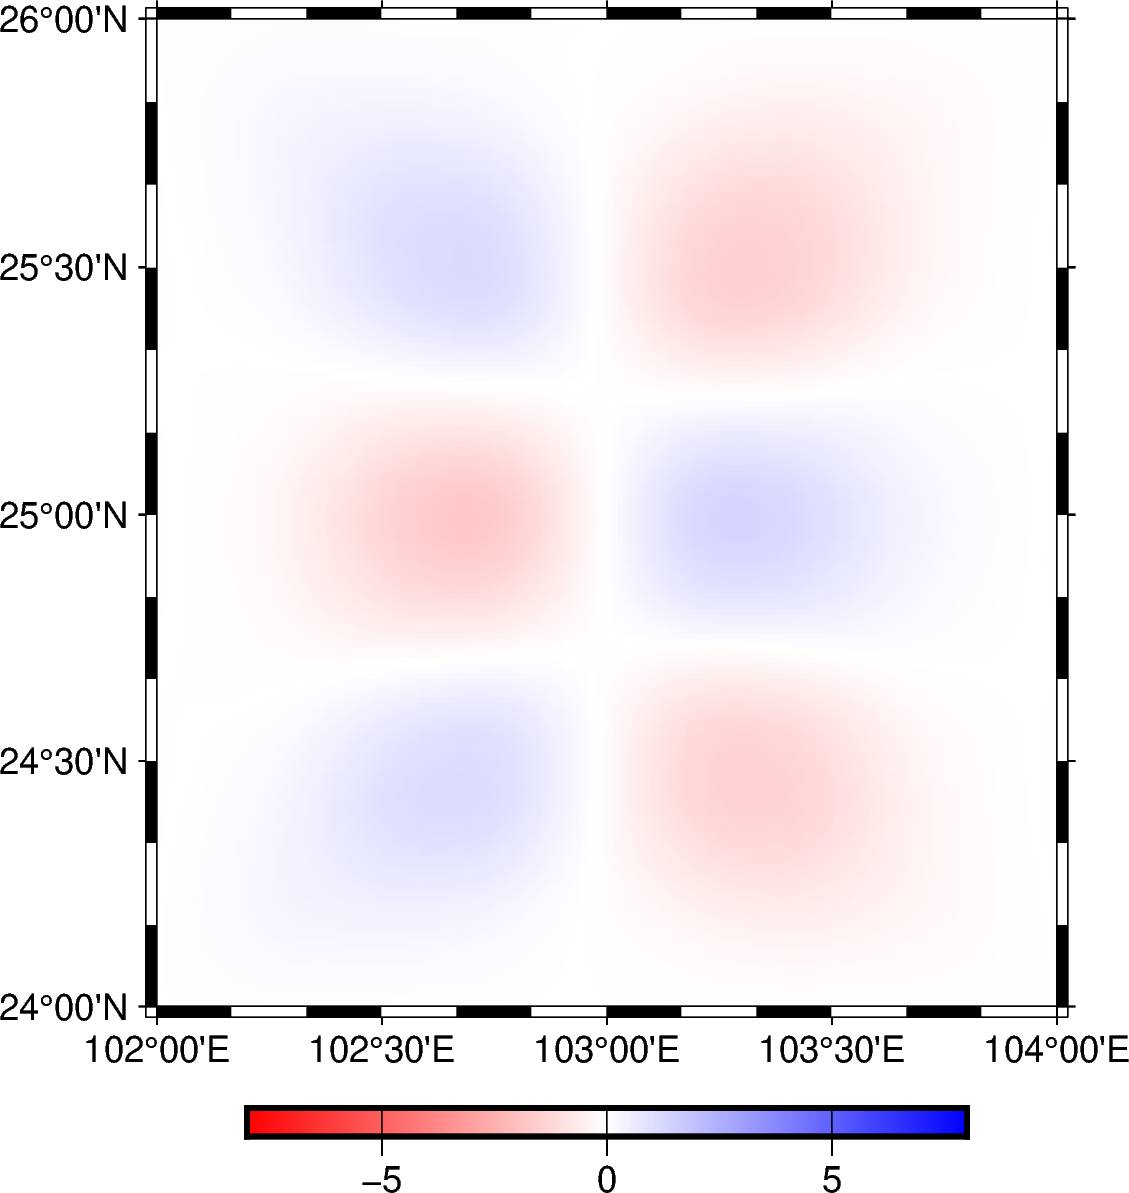

In [3]:
# points = pd.read_csv('OUTPUT_FILES/final_model.dat', sep='\s+', header=None)
# points = pd.read_csv('OUTPUT_FILES/target_model.dat', sep='\s+', header=None)
# points_init = pd.read_csv('OUTPUT_FILES/initial_model.dat', sep='\s+', header=None)
points_init = h5py.File('OUTPUT_FILES/initial_model.h5', 'r')['model'][:].T
points = h5py.File('OUTPUT_FILES/final_model.h5', 'r')['model'][:].T
dv = 100*(points[:,3]-points_init[:,3])/points_init[:,3]
points[:,3] = dv
region = [102, 104, 24,26]
depth = [3]
for i, d in enumerate(depth):
    data1 = points[points[:,2] == d][:,[0, 1, 3]]
    grid = pygmt.surface(data=data1, region=region, spacing='0.01/0.01')
    fig = pygmt.Figure()
    pygmt.makecpt(cmap='polar', series=[-8, 8, 0.1], continuous=True, reverse=True)
    fig.grdimage(
        grid,
        cmap=True,
        region=region,
        projection='M3i',
        frame='af'
    )
    fig.colorbar(frame='ag')
    fig.show()